# Analysis of FOND-SAT and ASP solvers on FOND problems

This notebook uses the following packages:
- [Pandas](https://pandas.pydata.org/)
- [Seaborn](https://seaborn.pydata.org/) 
- [Numpy](https://numpy.org/)
- [Statsmodels](https://www.statsmodels.org/stable/index.html)

The notebook uses the csv files generated by the output processing script from the benchmarking folder. This notebook analysis the solvers for each scenario.

In [2]:
# import the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Scenario based analysis: Visualisation

### Load and transform the data

In [7]:
# set the path to the csv file
csv_file = "~/Work/Data/FondASP/final.csv"

In [8]:
scenario = "miner"
df_all = pd.read_csv(csv_file)
df_scenario = df_all.query(f"scenario=='{scenario}'")
df_scenario.head()

,scenario,instance,solver,total-time,ground-time,solve-time,states
926,miner,p19,fondsat-glucose,292.300560,177.095464,57.740039,21
927,miner,p19,fondsat-minisat,627.151083,241.957238,311.567633,21
928,miner,p19,asp-opt-1,2132.716000,409.146000,1723.570000,21
929,miner,p26,fondsat-glucose,181.858363,112.182508,34.645741,19
930,miner,p26,fondsat-minisat,305.849650,138.425084,119.660548,19


Next, we will transform the data such that scenario name and instance become the index and the columns are organised as per the solver. The output from the cell should show the head of the dataframe and information such as the total number of instances solved, etc.

In [ ]:
df_scenario = df_scenario.pivot(index=["scenario", "instance"], columns="solver", values=["total-time", "ground-time", "solve-time"])
display(df_scenario.head())
df_scenario.info()

### Comparison of Total Time

We will use the ratio of solve times between different solvers as the comparison metric.

In [ ]:
s1 = "fondsat-glucose"
s2 = "fondsat-minisat"
k1 = ("total-time", s1)
k2 = ("total-time", s2)

metric = "glucose/minisat"
better = "glucose<minisat"
df_scenario[metric] = df_scenario[k1]/df_scenario[k2]
df_scenario[better] = np.where(df_scenario[metric]<1, "Glucose is faster than Minisat", "Minisat is faster than Glucose")

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.scatterplot(data=df_scenario, x=k1, y=k2, style=better, hue=better, palette='Paired_r')
ax.set(xlabel="fondsat-glucose", ylabel="fondsat-minisat")

X_plot = np.linspace(0, 5000, 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='#666666', linestyle='dotted')
plt.legend(loc='upper left', frameon=False)
plt.title(f"Scatter plot of total time (seconds) for {s1} and {s2} for {scenario}")
plt.show()

**NOTE**: The dotted line marks where the solving times are equal. Points above the line indicate instances where Glucose is faster and the points below indicate where Minisat is faster.

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.histplot(np.log(df_scenario[metric]), kde=True, stat="density", palette='Dark2', linewidth=0, bins=50)
ax.set(xlabel=f'log({s1}/{s2})')
plt.title(f"Comparison of total solving time for {s1} and {s2} for {scenario}");

## Helper functions
We will wrap the code in functions to reproduce the plots for other scenarios

In [9]:
def plot_scenario(df_all, scenario, metric_key, metric_label, solver_1_key, solver_2_key, solver_1_name, solver_2_name):
    # filter and transform the data
    df_scenario = df_all.query(f"scenario=='{scenario}'")
    df_scenario = df_scenario.pivot(index=["scenario", "instance"], columns="solver", values=["total-time", "ground-time", "solve-time"])
    
    # print the number of samples
    num_data_points = df_scenario.shape[0]
    print(f"Scenario {scenario} has {num_data_points} samples for {solver_1_name} and {solver_2_name}.")
    
    # compute the ratio of times
    k1 = (metric_key, solver_1_key)
    k2 = (metric_key, solver_2_key)

    metric = f"{solver_1_name}/{solver_2_name}"
    better = f"{solver_1_name}<{solver_2_name}"
    df_scenario[metric] = df_scenario[k1]/df_scenario[k2]
    df_scenario[better] = np.where(df_scenario[metric]<1, f"{solver_1_name} is faster than {solver_2_name}", f"{solver_2_name} is faster than {solver_1_name}")
    
    # now plot the data
    plt.figure(figsize=(10,6))

    ax = sns.scatterplot(data=df_scenario, x=k1, y=k2, style=better, hue=better, palette='Paired_r')
    ax.set(xlabel=solver_1_name, ylabel=solver_2_name)

    max_time = max(df_scenario[k1].max(), df_scenario[k2].max())
    X_plot = np.linspace(0, max_time, 100)
    Y_plot = X_plot
    plt.plot(X_plot, Y_plot, color='#666666', linestyle='dotted')
    plt.legend(loc='lower right', frameon=False)
    plt.title(f"Scatter plot of {metric_label}(seconds) for {solver_1_name} and {solver_2_name} for {scenario}")
    plt.show()
    
    plt.figure(figsize=(10,6))
    ax = sns.histplot(np.log(df_scenario[metric]), kde=True, stat="density", palette='Dark2', linewidth=0, bins=50)
    ax.set(xlabel=f'log({solver_1_name}/{solver_2_name})')
    plt.title(f"Comparison of {metric_label} for {solver_1_name} and {solver_2_name} for {scenario}");

## Glucose vs Minisat

In [10]:
s1_key = "fondsat-glucose"
s2_key = "fondsat-minisat"
s1_name = "Glucose"
s2_name = "Minisat"
metric_key = "total-time"
metric_label = "total solving time"

Scenario miner has 51 samples for Glucose and Minisat.


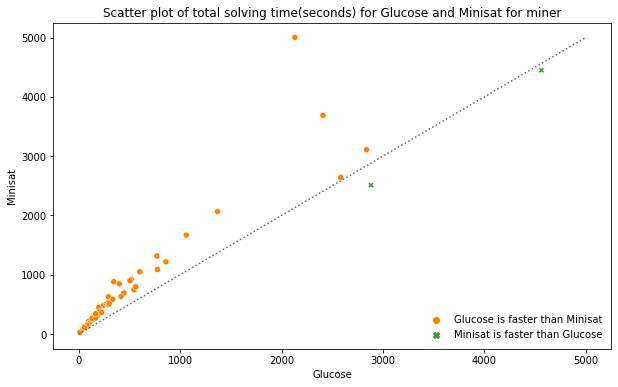

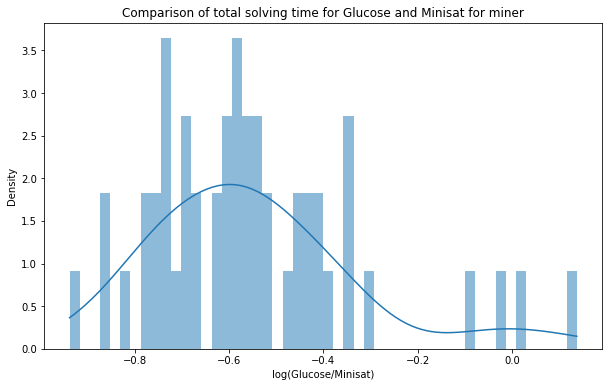

In [11]:
plot_scenario(df_all, "miner", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario islands has 60 samples for Glucose and Minisat.


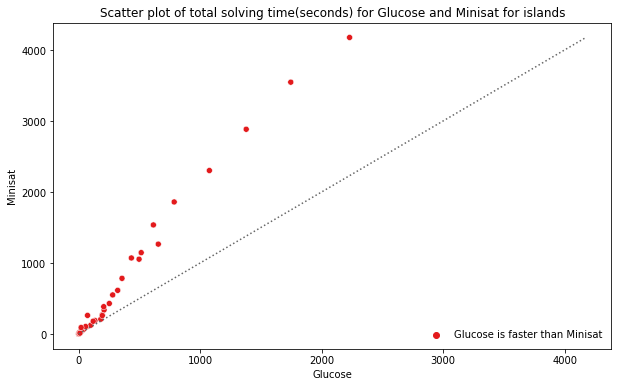

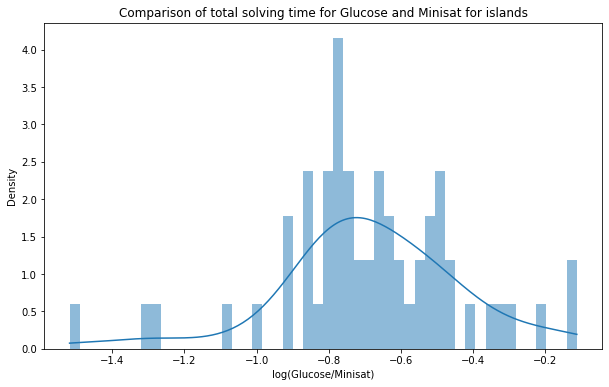

In [12]:
plot_scenario(df_all, "islands", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario doors has 15 samples for Glucose and Minisat.


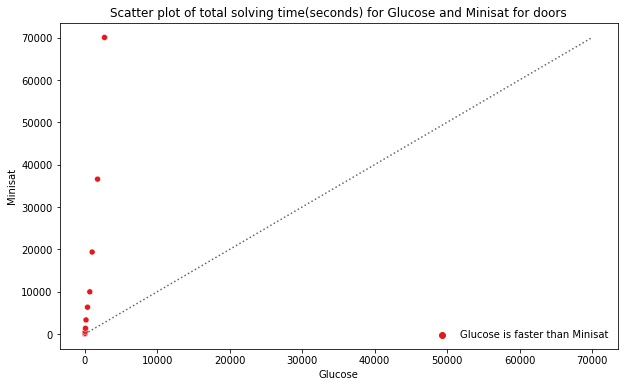

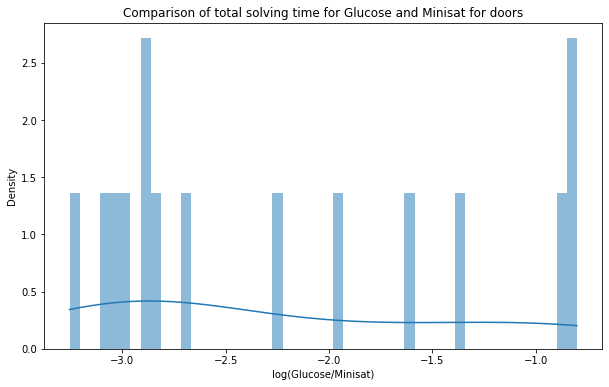

In [13]:
plot_scenario(df_all, "doors", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario tireworld-truck has 74 samples for Glucose and Minisat.


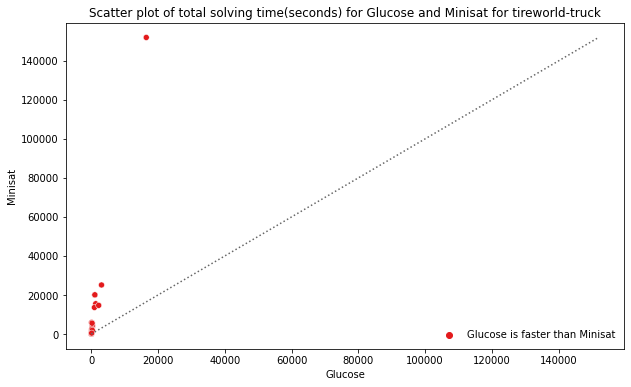

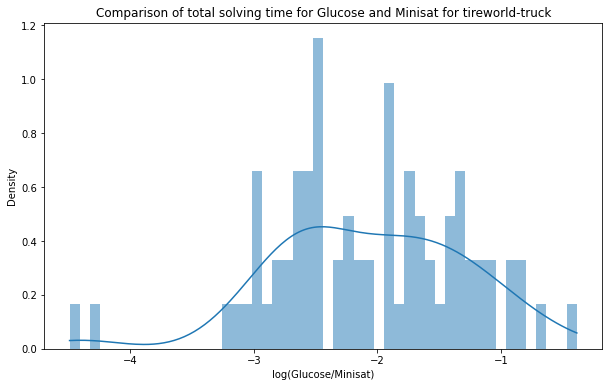

In [14]:
plot_scenario(df_all, "tireworld-truck", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

## Glucose vs ASP (1 thread)


In [15]:
s1_key = "fondsat-glucose"
s2_key = "asp-opt-1"
s1_name = "Glucose"
s2_name = "ASP-1"
metric_key = "total-time"
metric_label = "total solving time"

Scenario miner has 51 samples for Glucose and ASP-1.


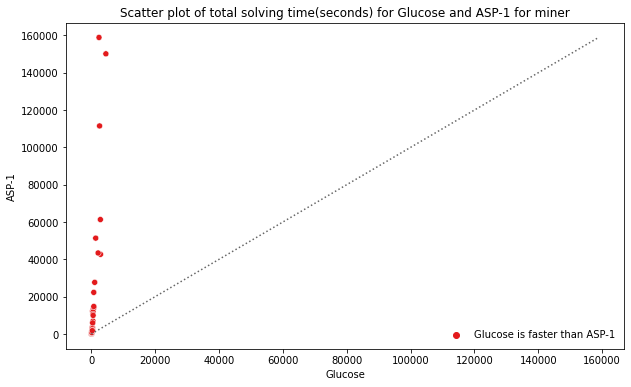

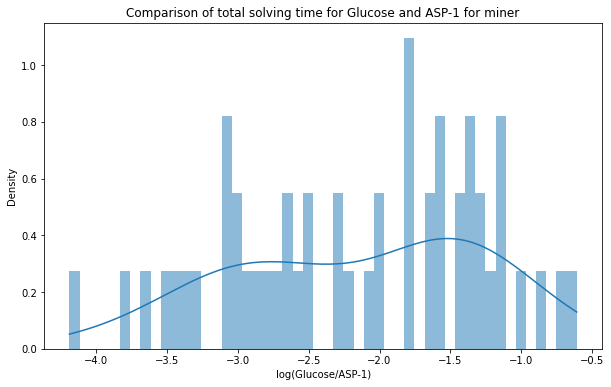

In [16]:
plot_scenario(df_all, "miner", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario islands has 60 samples for Glucose and ASP-1.


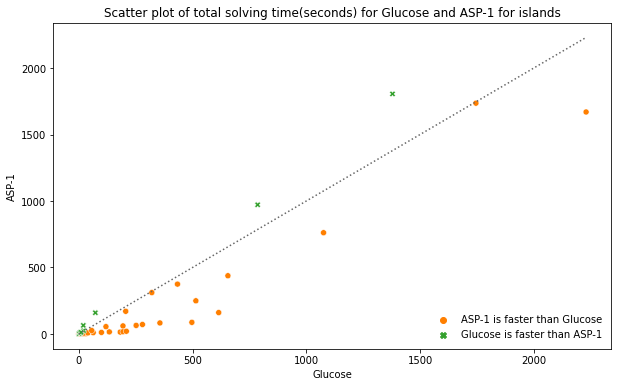

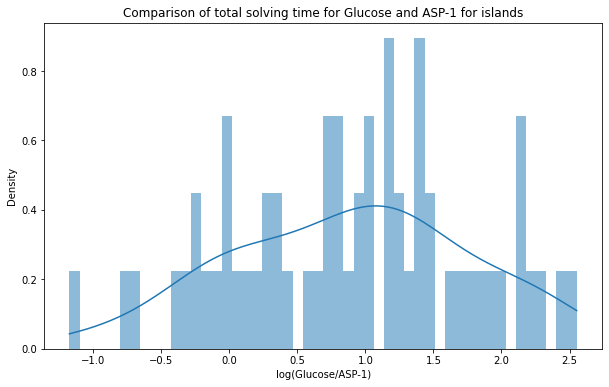

In [17]:
plot_scenario(df_all, "islands", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario doors has 15 samples for Glucose and ASP-1.


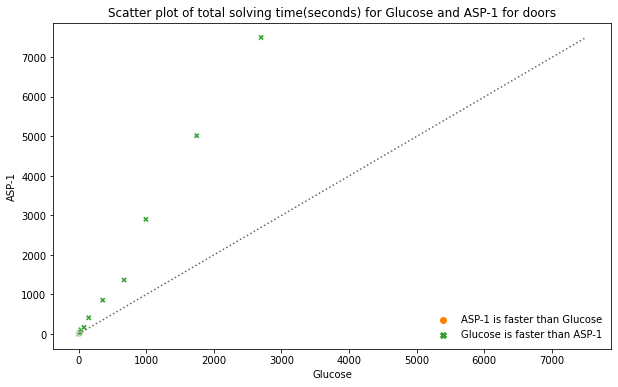

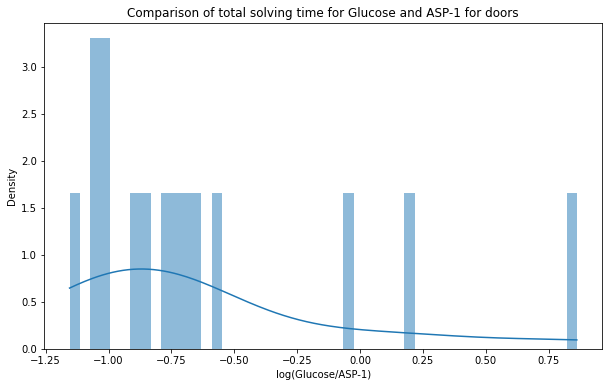

In [18]:
plot_scenario(df_all, "doors", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario tireworld-truck has 74 samples for Glucose and ASP-1.


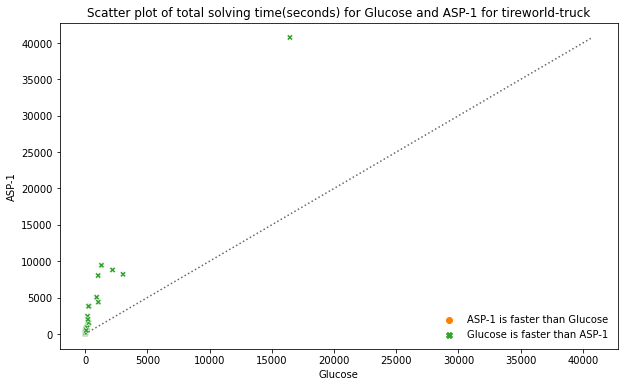

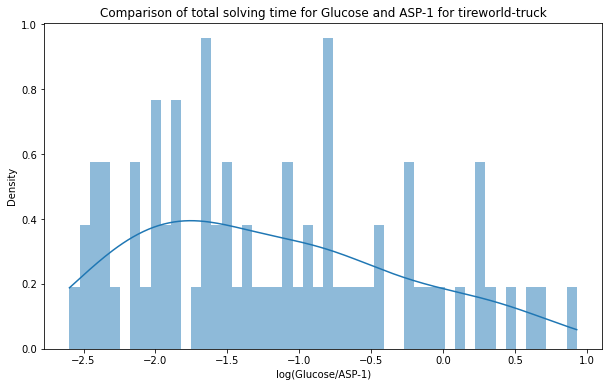

In [19]:
plot_scenario(df_all, "tireworld-truck", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

## Glucose vs ASP (8 threads)


In [20]:
s1_key = "fondsat-glucose"
s2_key = "asp-opt-8"
s1_name = "Glucose"
s2_name = "ASP-8"
metric_key = "total-time"
metric_label = "total solving time"

Scenario islands has 60 samples for Glucose and ASP-8.


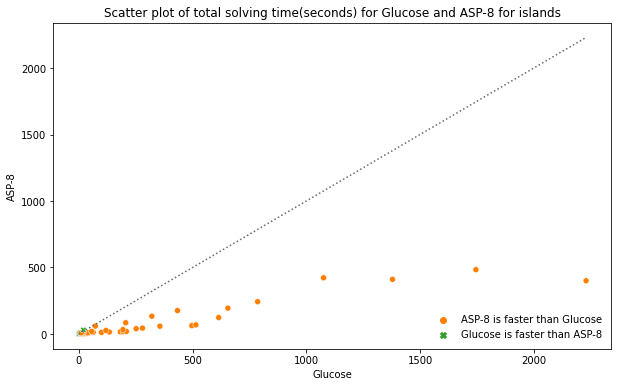

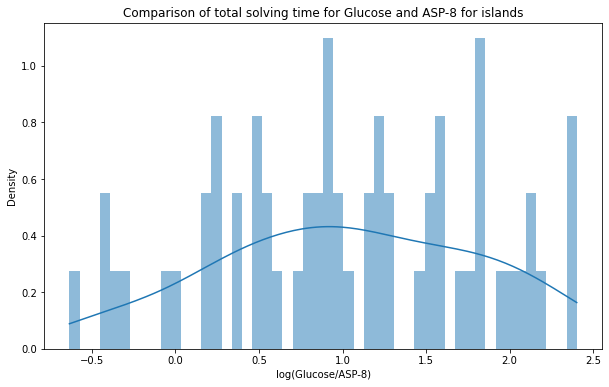

In [21]:
plot_scenario(df_all, "islands", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario doors has 15 samples for Glucose and ASP-8.


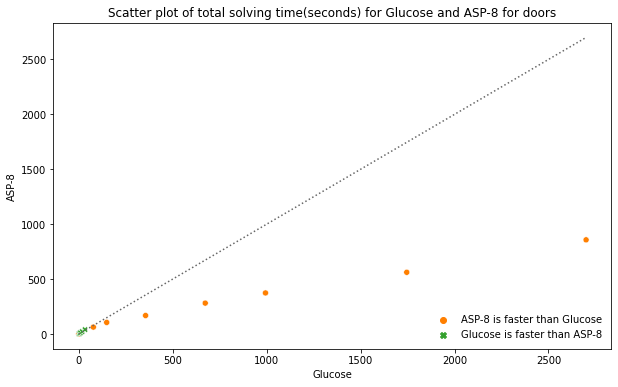

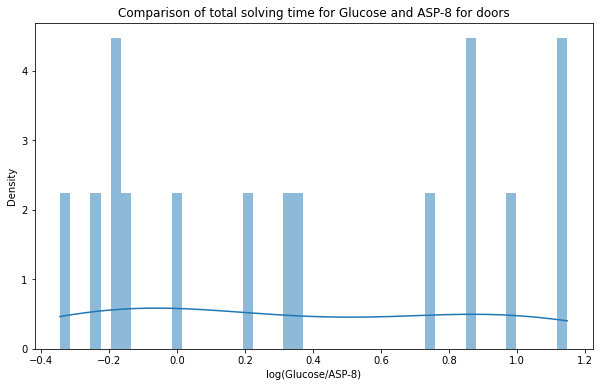

In [22]:
plot_scenario(df_all, "doors", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

Scenario tireworld-truck has 74 samples for Glucose and ASP-8.


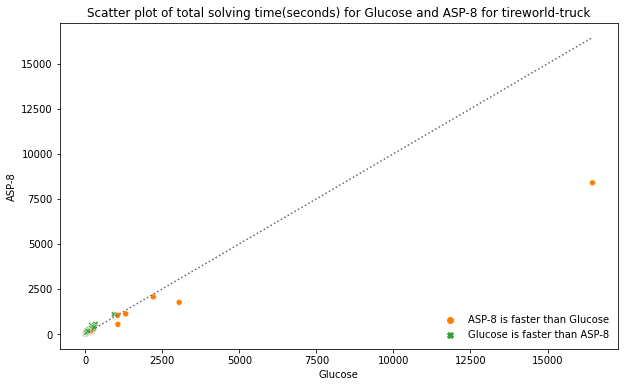

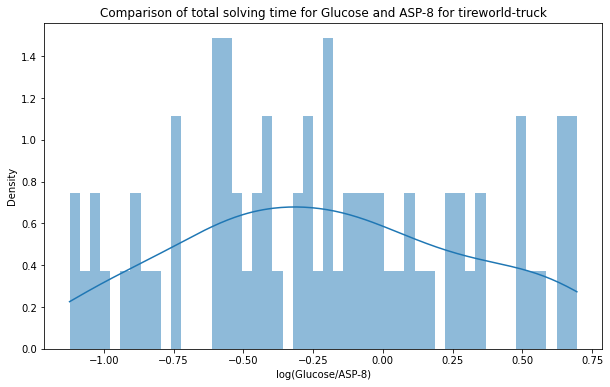

In [23]:
plot_scenario(df_all, "tireworld-truck", metric_key, metric_label, s1_key , s2_key , s1_name, s2_name)

## Scenario based analysis: Relationship between solvers
Next we will use regression to identify relation ships between solvers in different scenarios.

In general, given the expected time for solver A (denoted by $\mu_A$) and the expected time for solver B (denoted by $\mu_B$), we are interested in finding $\alpha$ and $\beta$ such that $\mu_A = \alpha + \beta\mu_B$. We will use a regression model to fit the instance data to extract such a relationship.

In [24]:
# load the data again
scenario = "islands"
df_all = pd.read_csv(csv_file)
df_scenario = df_all.query(f"scenario=='{scenario}'")
df_scenario = df_scenario.pivot(index=["scenario", "instance"], columns="solver", values=["total-time", "ground-time", "solve-time"])
df_scenario.head()

total-time                                      \
solver             asp-opt-1 asp-opt-4 asp-opt-8 fondsat-glucose   
scenario instance                                                  
islands  p01           0.032     0.031     0.040        0.127198   
         p02           0.079     0.076     0.070        0.173118   
         p03           0.098     0.106     0.112        0.184426   
         p04           0.118     0.109     0.154        0.246695   
         p05           0.104     0.182     0.211        0.300346   

                                  ground-time                      \
solver            fondsat-minisat   asp-opt-1 asp-opt-4 asp-opt-8   
scenario instance                                                   
islands  p01             0.200390       0.032     0.031     0.040   
         p02             0.284280       0.079     0.076     0.060   
         p03             0.330177       0.098     0.106     0.102   
         p04             0.500155       0.118     0.109     0.144   
         p05             0.669400       0.104     0.182     0.181   

                                                  solve-time            \
solver            fondsat-glucose fondsat-minisat  asp-opt-1 asp-opt-4   
scenario instance                                                        
islands  p01             0.028637        0.035877        0.0       0.0   
         p02             0.040410        0.066926        0.0       0.0   
         p03             0.062213        0.125282        0.0       0.0   
         p04             0.096144        0.219962        0.0       0.0   
         p05             0.141899        0.331573        0.0       0.0   

                                                             
solver            asp-opt-8 fondsat-glucose fondsat-minisat  
scenario instance                                            
islands  p01           0.00        0.014273        0.029966  
         p02           0.01        0.020139        0.039681  
         p03           0.01        0.027764        0.068551  
         p04           0.01        0.034025        0.107212  
         p05           0.03        0.046206        0.155687

In [25]:
s1 = "fondsat-glucose"
s2 = "fondsat-minisat"
metric = "total-time"
k1 = (metric, s1)
k2 = (metric, s2)

A = df_scenario[k1].values
B = df_scenario[k2].values

A_C = sm.add_constant(A) # adding a constant
model = sm.RLM(B, A_C).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                            RLM   Df Residuals:                       58
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:37:43                                         
No. Iterations:                    16                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0308      2.450     -1.237      0.216      -7.833       1.772
x1             2.0356      0.005    398.891      0.000       2.026       2.046
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

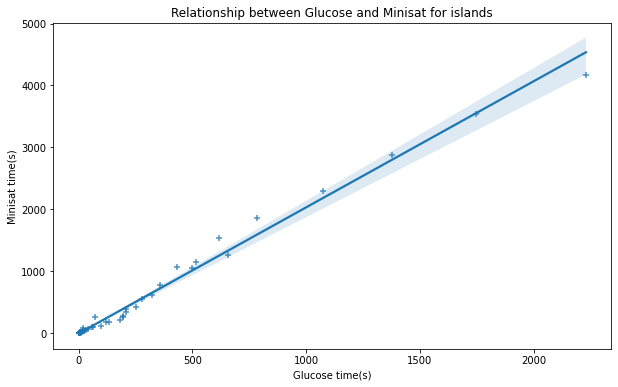

In [26]:
plt.figure(figsize=(10,6))
ax = sns.regplot(x=A, y=B, data=df_scenario, marker="+", robust=True)
ax.set(xlabel="Glucose time(s)", ylabel="Minisat time(s)");
plt.title(f"Relationship between Glucose and Minisat for {scenario}");

Let us combined the output of regression and the plot in one function.

In [27]:
def analyse_scenario(df_all, scenario, metric_key, solver_1_key, solver_2_key, solver_1_name, solver_2_name):
    # filter and transform the data
    df_scenario = df_all.query(f"scenario=='{scenario}'")
    df_scenario = df_scenario.pivot(index=["scenario", "instance"], columns="solver", values=["total-time", "ground-time", "solve-time"])
    
    k1 = (metric_key, solver_1_key)
    k2 = (metric_key, solver_2_key)

    # regression
    A = df_scenario[k1].values
    B = df_scenario[k2].values

    A_C = sm.add_constant(A) # adding a constant
    model = sm.RLM(B, A_C).fit()
    display(model.summary())
    
    # plot
    plt.figure(figsize=(10,6))
    ax = sns.regplot(x=A, y=B, data=df_scenario, marker="+", robust=True)
    ax.set(xlabel=f"{solver_1_name} time(s)", ylabel=f"{solver_2_name} time(s)");
    plt.title(f"Relationship between {solver_1_name} and {solver_2_name} for {scenario}");
    plt.show()

## Glucose vs Minisat

In [28]:
s1_key = "fondsat-glucose"
s2_key = "fondsat-minisat"
s1_name = "Glucose"
s2_name = "Minisat"
metric_key = "total-time"

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:                            RLM   Df Residuals:                       49
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:37:49                                         
No. Iterations:                    33                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.5678     30.057      5.941      0.000     119.658     237.478
x1             1.0522      0.027     38.671      0.000       0.999       1.106
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

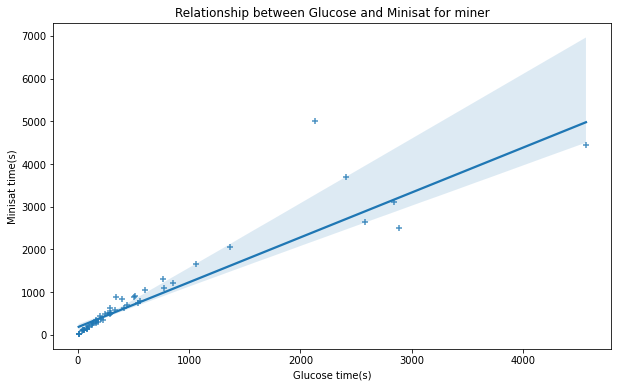

In [29]:
analyse_scenario(df_all, "miner", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                            RLM   Df Residuals:                       58
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:37:53                                         
No. Iterations:                    16                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0308      2.450     -1.237      0.216      -7.833       1.772
x1             2.0356      0.005    398.891      0.000       2.026       2.046
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

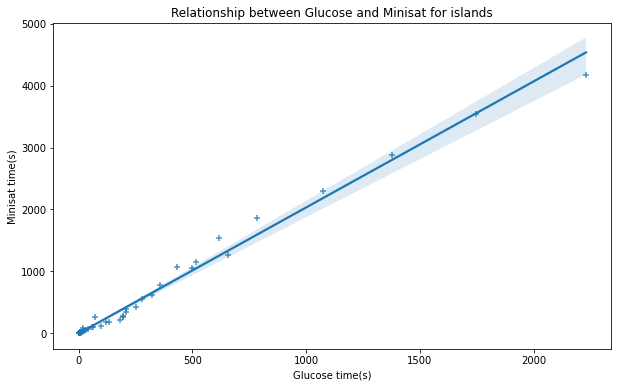

In [30]:
analyse_scenario(df_all, "islands", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                            RLM   Df Residuals:                       13
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:37:59                                         
No. Iterations:                    20                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -138.0798     88.240     -1.565      0.118    -311.026      34.866
x1            21.0978      0.099    213.283      0.000      20.904      21.292
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

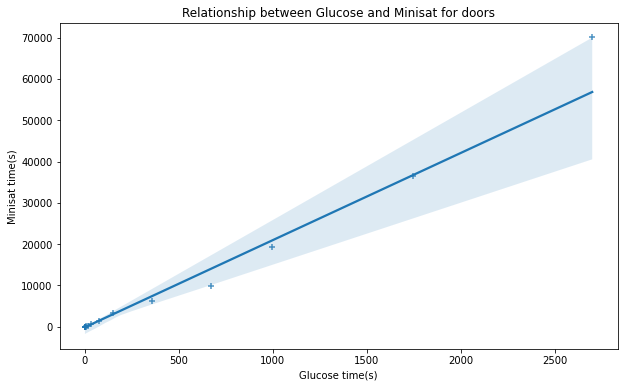

In [31]:
analyse_scenario(df_all, "doors", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   74
Model:                            RLM   Df Residuals:                       72
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:03                                         
No. Iterations:                    17                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.2974     27.779      2.459      0.014      13.852     122.743
x1             9.2308      0.014    658.561      0.000       9.203       9.258
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

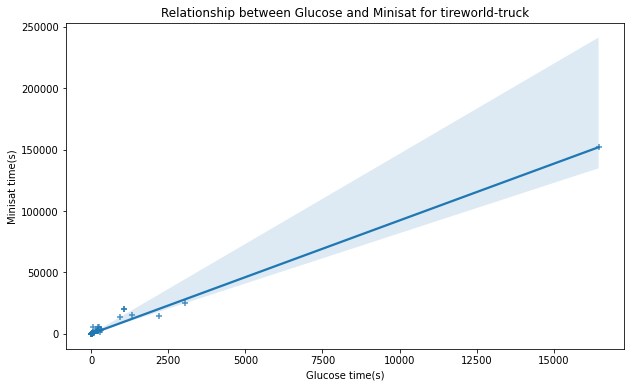

In [32]:
analyse_scenario(df_all, "tireworld-truck", metric_key, s1_key , s2_key , s1_name, s2_name)

## Glucose vs ASP (1 thread)

In [33]:
s1_key = "fondsat-glucose"
s2_key = "asp-opt-1"
s1_name = "Glucose"
s2_name = "ASP-1"
metric_key = "total-time"
metric_label = "total solving time"

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:                            RLM   Df Residuals:                       49
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:07                                         
No. Iterations:                    33                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3993.3660    606.894     -6.580      0.000   -5182.857   -2803.875
x1            29.8459      0.549     54.322      0.000      28.769      30.923
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

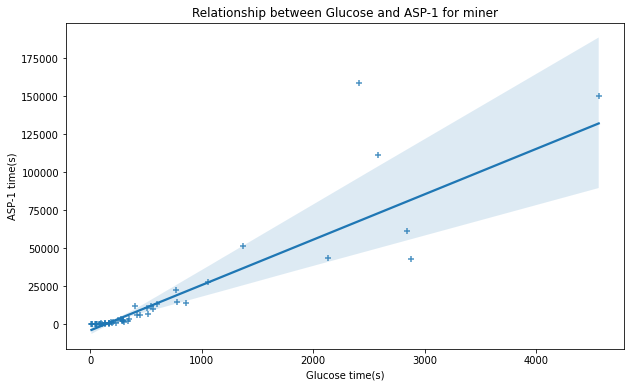

In [34]:
analyse_scenario(df_all, "miner", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                            RLM   Df Residuals:                       58
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:10                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9720      3.296     -2.115      0.034     -13.433      -0.511
x1             0.7498      0.007    109.215      0.000       0.736       0.763
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

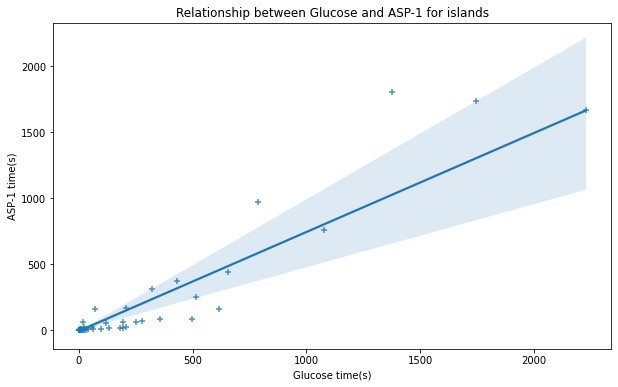

In [35]:
analyse_scenario(df_all, "islands", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                            RLM   Df Residuals:                       13
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:16                                         
No. Iterations:                    14                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9027      3.170     -1.231      0.218     -10.116       2.310
x1             2.7825      0.004    783.021      0.000       2.776       2.790
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

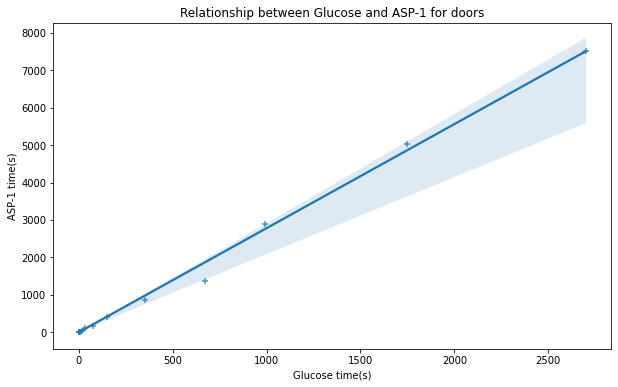

In [36]:
analyse_scenario(df_all, "doors", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   74
Model:                            RLM   Df Residuals:                       72
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:21                                         
No. Iterations:                    21                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.6835     42.321      5.214      0.000     137.735     303.632
x1             2.4831      0.021    116.280      0.000       2.441       2.525
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

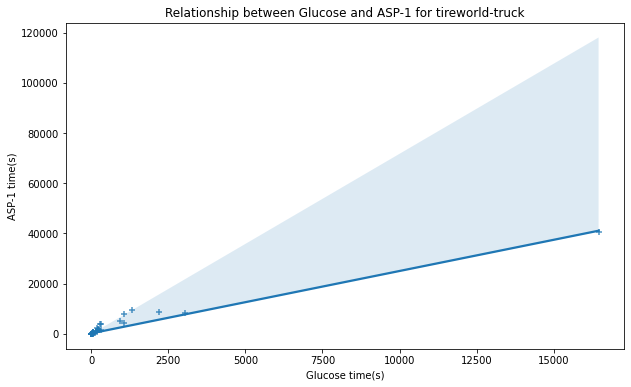

In [37]:
analyse_scenario(df_all, "tireworld-truck", metric_key, s1_key , s2_key , s1_name, s2_name)

## Glucose vs ASP (8 threads)

In [38]:
s1_key = "fondsat-glucose"
s2_key = "asp-opt-8"
s1_name = "Glucose"
s2_name = "ASP-8"
metric_key = "total-time"

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                            RLM   Df Residuals:                       58
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:26                                         
No. Iterations:                    24                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2380      1.274     -0.187      0.852      -2.735       2.259
x1             0.2750      0.003    103.648      0.000       0.270       0.280
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

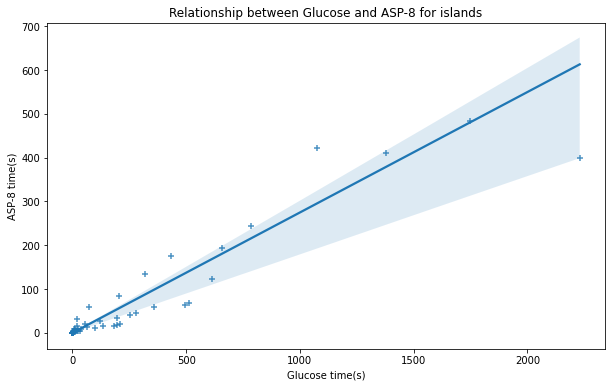

In [39]:
analyse_scenario(df_all, "islands", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                            RLM   Df Residuals:                       13
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:31                                         
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3004      8.469      2.751      0.006       6.701      39.900
x1             0.3166      0.009     33.351      0.000       0.298       0.335
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

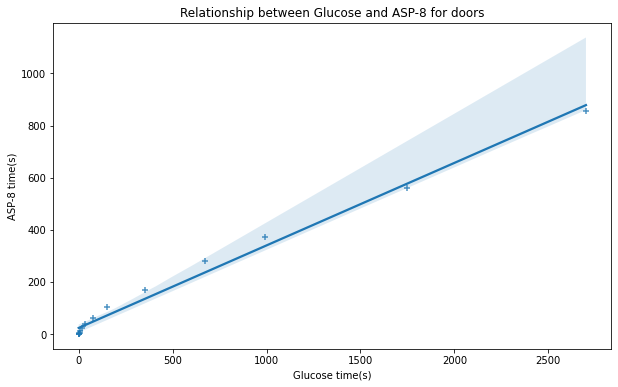

In [40]:
analyse_scenario(df_all, "doors", metric_key, s1_key , s2_key , s1_name, s2_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   74
Model:                            RLM   Df Residuals:                       72
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 24 Jun 2022                                         
Time:                        12:38:34                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.4587      9.291      5.754      0.000      35.248      71.669
x1             0.5104      0.005    108.868      0.000       0.501       0.520
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

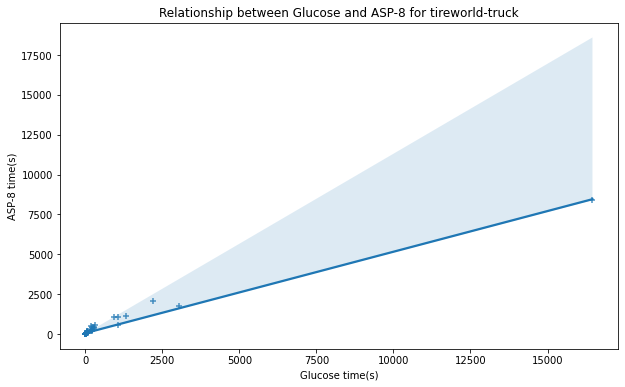

In [41]:
analyse_scenario(df_all, "tireworld-truck", metric_key, s1_key , s2_key , s1_name, s2_name)